# Problem Statement

The management at Expert Sales Enterprise, a fictitious marketing agency, consistently invests in a variety of training and development schemes aimed at enhancing the success rate of their sales employees in achieving their set targets. The management is determined to comprehend the efficacy of these training initiatives and their contributions to the performance and efficiency of the employees. They are convinced that insights derived from data analysis focused on the impact will empower them to make well-informed choices concerning the optimization of the training programs and the efficient allocation of resources.

In your role as an HR Analyst, you are tasked with evaluating the influence of the training and development programs on the performance and productivity of the employees. Your responsibility involves conducting a comprehensive analysis of the impact of these programs using both pre-training and post-training data.

In [1]:
#import needed liberaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_rel
import seaborn as sns

In [2]:
# load the CSV data and create a dataframe
df = pd.read_csv(r'C:\Users\agozi\Desktop\DATA\HR_Data.CSV')

In [3]:
# print the data to see if it loaded properly 
df.head()

,Emp_ID,Training_ID,Gender,Age,Edu_background,Experience_level,Pre_training_Sales_revenue,Pre_training_data_year,Department,Role,Pre_training_target,Training_evaluation_score,Training_completion_status,Training_duration_in_days,Post_training_Sales_revenue,Post_training_data_year,Post_training_target,Employment_type
0,ENG00234,Training_2,Male,35,High school,senior,18046046,2022,Sales,Sales Rep,Failed,86,Yes,7,11611408,2021,Achieved,Full-time
1,ENG00073,Training_1,Female,27,High school,senior,29646485,2020,Sales,Sales Manager,Failed,68,Yes,14,38864905,2021,Failed,Part-time
2,ENG00078,Training_3,Male,35,Masters,senior,30657715,2021,Sales,Sales Executive,Achieved,22,Yes,7,18354544,2022,Achieved,Contract
3,ENG00075,Training_3,Female,30,College_degree,senior,5883971,2020,Sales,Sales Executive,Failed,94,Yes,7,34075855,2020,Achieved,Part-time
4,ENG00127,Training_2,Male,23,College_degree,senior,15374421,2022,Sales,Sales Rep,Achieved,32,Yes,7,17908392,2022,Failed,Part-time


In [4]:
# use the describe command to check the distribution of the dataset
df.describe()

,Age,Pre_training_Sales_revenue,Pre_training_data_year,Training_evaluation_score,Training_duration_in_days,Post_training_Sales_revenue,Post_training_data_year
count,350.000000,3.500000e+02,350.0000,350.000000,350.000000,3.500000e+02,350.000000
mean,39.237143,2.032401e+07,2020.9800,52.511429,10.360000,2.030120e+07,2020.937143
std,12.819813,1.141847e+07,0.7919,28.133404,3.502206,1.159102e+07,0.816410
min,18.000000,6.060100e+05,2020.0000,1.000000,7.000000,5.387640e+05,2020.000000
25%,28.000000,1.063604e+07,2020.0000,28.000000,7.000000,1.016102e+07,2020.000000
50%,39.000000,1.956613e+07,2021.0000,52.000000,7.000000,1.995032e+07,2021.000000
75%,51.000000,3.052556e+07,2022.0000,77.750000,14.000000,3.030535e+07,2022.000000
max,60.000000,3.993977e+07,2022.0000,100.000000,14.000000,3.999278e+07,2022.000000


In [5]:
# have already cleaned the data in the SQL process but lets check for null values again to be certin we are not missing anythng
df.isnull().sum()

Emp_ID                         0
Training_ID                    0
Gender                         0
Age                            0
Edu_background                 0
Experience_level               0
Pre_training_Sales_revenue     0
Pre_training_data_year         0
Department                     0
Role                           0
Pre_training_target            0
Training_evaluation_score      0
Training_completion_status     0
Training_duration_in_days      0
Post_training_Sales_revenue    0
Post_training_data_year        0
Post_training_target           0
Employment_type                0
dtype: int64

# lets see how well each Traning Program performed 

To do this, we will be comparing the sucess matrics to see which program performed better 

In [6]:
# Replace 'Failed' with No and Achieved with yes 
df['Pre_training_target'] = df['Pre_training_target'].replace('Failed', 'No')
df['Pre_training_target'] = df['Pre_training_target'].replace('Achieved', 'Yes')
df['Post_training_target'] = df['Post_training_target'].replace('Achieved', 'Yes')
df['Post_training_target'] = df['Post_training_target'].replace('Failed', 'No')
df.head(10)

,Emp_ID,Training_ID,Gender,Age,Edu_background,Experience_level,Pre_training_Sales_revenue,Pre_training_data_year,Department,Role,Pre_training_target,Training_evaluation_score,Training_completion_status,Training_duration_in_days,Post_training_Sales_revenue,Post_training_data_year,Post_training_target,Employment_type
0,ENG00234,Training_2,Male,35,High school,senior,18046046,2022,Sales,Sales Rep,No,86,Yes,7,11611408,2021,Yes,Full-time
1,ENG00073,Training_1,Female,27,High school,senior,29646485,2020,Sales,Sales Manager,No,68,Yes,14,38864905,2021,No,Part-time
2,ENG00078,Training_3,Male,35,Masters,senior,30657715,2021,Sales,Sales Executive,Yes,22,Yes,7,18354544,2022,Yes,Contract
3,ENG00075,Training_3,Female,30,College_degree,senior,5883971,2020,Sales,Sales Executive,No,94,Yes,7,34075855,2020,Yes,Part-time
4,ENG00127,Training_2,Male,23,College_degree,senior,15374421,2022,Sales,Sales Rep,Yes,32,Yes,7,17908392,2022,No,Part-time
5,ENG00027,Training_2,Female,30,Masters,senior,33243398,2020,Sales,Sales Executive,Yes,46,Yes,7,9173829,2022,No,Contract
6,ENG00074,Training_1,Male,28,Masters,Entry,30823948,2021,Sales,Sales Manager,No,24,Yes,7,13703969,2022,No,Contract
7,ENG00165,Training_3,Male,59,College_degree,mid-level,21984880,2020,Sales,Sales Executive,No,86,Yes,7,18221626,2022,Yes,Part-time
8,ENG00205,Training_1,Female,51,College_degree,senior,36967114,2020,Sales,Sales Manager,No,51,Yes,7,29922828,2021,No,Full-time
9,ENG00214,Training_1,Female,38,High school,mid-level,22235773,2021,Sales,Sales Manager,No,59,Yes,7,25764488,2022,No,Part-time


In [7]:
# lets check for unique values in the columns 
unique_pre_training_targets = df['Pre_training_target'].unique()
unique_post_training_targets = df['Post_training_target'].unique()

print("Unique values in Pre_training_target:")
print(unique_pre_training_targets)

print("Unique values in Post_training_target:")
print(unique_post_training_targets)


Unique values in Pre_training_target:
['No' 'Yes']
Unique values in Post_training_target:
['Yes' 'No']


In [22]:
# Selecting specific columns for analysis
df1 = df[['Training_ID', 'Edu_background', 'Experience_level', 'Pre_training_Sales_revenue', 'Pre_training_data_year', 'Role',
          'Pre_training_target', 'Training_evaluation_score', 'Training_completion_status', 'Training_duration_in_days', 
         'Post_training_Sales_revenue', 'Post_training_data_year', 'Post_training_target', 'Employment_type']]

# Converting 'Pre_training_target' and 'Post_training_target' to binary using .loc indexer
df1.loc[:, 'Pre_training_target'] = df1['Pre_training_target'].map({'No': 0, 'Yes': 1})
df1.loc[:, 'Post_training_target'] = df1['Post_training_target'].map({'No': 0, 'Yes': 1})

# Display the updated DataFrame
#df1.head(10)


C:\Users\agozi\AppData\Local\Temp\ipykernel_12776\729497627.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Pre_training_target'] = df1['Pre_training_target'].map({'No': 0, 'Yes': 1})
C:\Users\agozi\AppData\Local\Temp\ipykernel_12776\729497627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Post_training_target'] = df1['Post_training_target'].map({'No': 0, 'Yes': 1})


In [9]:
# lets check for unique values in the columns 
unique_pre_training_targets = df1['Pre_training_target'].unique()
unique_post_training_targets = df1['Post_training_target'].unique()

print("Unique values in Pre_training_target:")
print(unique_pre_training_targets)

print("\nUnique values in Post_training_target:")
print(unique_post_training_targets)

Unique values in Pre_training_target:
[0 1]

Unique values in Post_training_target:
[1 0]


In [10]:
# Calculate the subscription renewal rate for each group
Pre_Target_achieved_rate = df1.groupby('Training_ID')['Pre_training_target'].sum() / df1.groupby('Training_ID')['Pre_training_target'].count()
Post_Target_achieved_rate = df1.groupby('Training_ID')['Post_training_target'].sum() / df1.groupby('Training_ID')['Post_training_target'].count()

# Print the subscription renewal rate for each group
print("Target Achievement Rate for pre Traning Program:")
print(Pre_Target_achieved_rate)

print("\nTarget Achievement Rate for post Traning Program:")
print(Post_Target_achieved_rate)

Target Achievement Rate for pre Traning Program:
Training_ID
Training_1    0.427273
Training_2    0.487395
Training_3    0.495868
Name: Pre_training_target, dtype: float64

Target Achievement Rate for post Traning Program:
Training_ID
Training_1    0.436364
Training_2    0.596639
Training_3    0.528926
Name: Post_training_target, dtype: float64


# Testing the hypothesis 

The essence of this test is to check if the difference in the pre traning and post traning matrics are statistically significantly or due to random chance.

Alpha = 0.05

Null Hypothesis (H0): There is no significant difference between the target achievement rates before and after the training programs.

Alternative Hypothesis (H1): There is a significant difference between the target achievement rates before and after the training programs. 

In [11]:
# Target Achievement Rate for pre Training Program
# Perform paired t-test
t_statistic, p_value = ttest_rel(Pre_Target_achieved_rate, Post_Target_achieved_rate)

# Print the results
print(f"Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Paired t-test results:
t-statistic: -1.6713772807696066
p-value: 0.23660723904680867


Interpretation:

With a p-value of 0.2366, which is greater than the typical significance level of 0.05, we do not have strong evidence to reject the null hypothesis. This means that we don't have sufficient evidence to conclude that There is a significant difference between the target achievement rates before and after the training programs. 

# Understanding how the matrics changed year on year

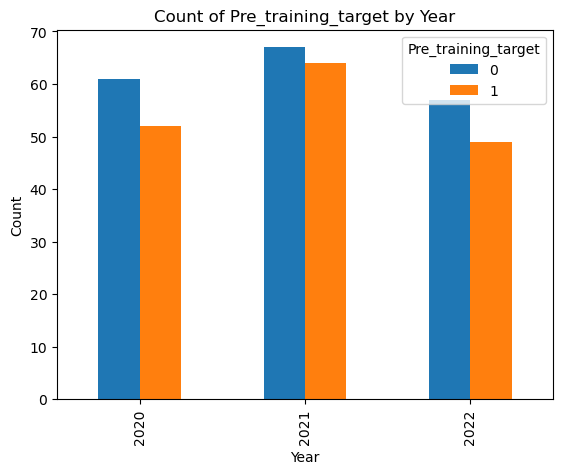

In [12]:
# Grouping by year and Pre_training_target and counting
grouped = df1.groupby(["Pre_training_data_year", "Pre_training_target"]).size().unstack(fill_value=0)

# Plotting the bar chart
grouped.plot(kind="bar")

plt.title("Count of Pre_training_target by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Pre_training_target", loc="upper right")

plt.show()

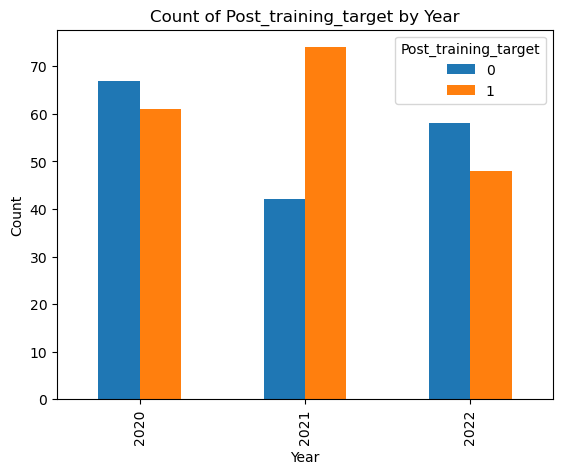

In [13]:
# Grouping by year and Post_training_target and counting
grouped = df1.groupby(["Post_training_data_year", "Post_training_target"]).size().unstack(fill_value=0)

# Plotting the bar chart
grouped.plot(kind="bar")

plt.title("Count of Post_training_target by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Post_training_target", loc="upper right")

plt.show()

# The relationship between Traning completion and target achievement rate

To start this, we will have to drop all training participants who did not actually complete the traning.  

In [14]:
# Drop rows where 'Training_completion_status' is 'No'
df2 = df1[df1['Training_completion_status'] != 'No']
df2.head()

,Training_ID,Edu_background,Experience_level,Pre_training_Sales_revenue,Pre_training_data_year,Role,Pre_training_target,Training_evaluation_score,Training_completion_status,Training_duration_in_days,Post_training_Sales_revenue,Post_training_data_year,Post_training_target,Employment_type
0,Training_2,High school,senior,18046046,2022,Sales Rep,0,86,Yes,7,11611408,2021,1,Full-time
1,Training_1,High school,senior,29646485,2020,Sales Manager,0,68,Yes,14,38864905,2021,0,Part-time
2,Training_3,Masters,senior,30657715,2021,Sales Executive,1,22,Yes,7,18354544,2022,1,Contract
3,Training_3,College_degree,senior,5883971,2020,Sales Executive,0,94,Yes,7,34075855,2020,1,Part-time
4,Training_2,College_degree,senior,15374421,2022,Sales Rep,1,32,Yes,7,17908392,2022,0,Part-time


In [15]:
# using the unique command, lets check if the changes where made. 
unique_Training_completion_status = df2['Training_completion_status'].unique()
print (unique_Training_completion_status)

['Yes']


In [16]:
# Calculate the subscription renewal rate for each group
Pre_Target_achieved_rate1 = df2.groupby('Training_ID')['Pre_training_target'].sum() / df2.groupby('Training_ID')['Pre_training_target'].count()
Post_Target_achieved_rate1 = df2.groupby('Training_ID')['Post_training_target'].sum() / df2.groupby('Training_ID')['Post_training_target'].count()

# Print the subscription renewal rate for each group
print("Target Achievement Rate for pre Traning Program:")
print(Pre_Target_achieved_rate1)

print("\nTarget Achievement Rate for post Traning Program:")
print(Post_Target_achieved_rate1)

Target Achievement Rate for pre Traning Program:
Training_ID
Training_1    0.430108
Training_2    0.504950
Training_3    0.495050
Name: Pre_training_target, dtype: float64

Target Achievement Rate for post Traning Program:
Training_ID
Training_1    0.451613
Training_2    0.594059
Training_3    0.544554
Name: Post_training_target, dtype: float64


In [17]:
# Target Achievement Rate for pre Training Program
# Perform paired t-test
t_statistic, p_value = ttest_rel(Pre_Target_achieved_rate1, Post_Target_achieved_rate1)

# Print the results
print(f"Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Paired t-test results:
t-statistic: -2.7215802288987496
p-value: 0.11264869218463308


Interpretation:

With a p-value of 0.1126, which is greater than the typical significance level of 0.05, we do not have strong evidence to reject the null hypothesis. This means that we don't have sufficient evidence to conclude that There is a significant difference between the target achievement rates before and after the training programs. However, when compared to the initial P-value of 0.23660 which inluded both those that completed the training as well as those who did not, we can see that those who completed the training has a lower p-value but thier outcome is due to random chance.

# Impact Analysis For Year 2021

In [18]:
# Filter the DataFrame based on the year
filtered_df = df2[df2['Pre_training_data_year'] == 2021]

# Calculate the subscription renewal rate for each group
Pre_Target_achieved_rate2 = filtered_df.groupby('Training_ID')['Pre_training_target'].sum() / filtered_df.groupby('Training_ID')['Pre_training_target'].count()
Post_Target_achieved_rate2 = filtered_df.groupby('Training_ID')['Post_training_target'].sum() / filtered_df.groupby('Training_ID')['Post_training_target'].count()

# Print the subscription renewal rate for each group
print("Target Achievement Rate for pre Traning Program:")
print(Pre_Target_achieved_rate2)

print("\nTarget Achievement Rate for post Traning Program:")
print(Post_Target_achieved_rate2)

Target Achievement Rate for pre Traning Program:
Training_ID
Training_1    0.527778
Training_2    0.515152
Training_3    0.525000
Name: Pre_training_target, dtype: float64

Target Achievement Rate for post Traning Program:
Training_ID
Training_1    0.444444
Training_2    0.666667
Training_3    0.500000
Name: Post_training_target, dtype: float64


In [19]:
# Target Achievement Rate for pre Training Program
# Perform paired t-test
t_statistic, p_value = ttest_rel(Pre_Target_achieved_rate2, Post_Target_achieved_rate2)

# Print the results
print(f"Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Paired t-test results:
t-statistic: -0.20388503898940008
p-value: 0.8573067874378176


Interpretation:

With a p-value of 0.857, which is greater than the typical significance level of 0.05, we do not have strong evidence to reject the null hypothesis. This means that we don't have sufficient evidence to conclude that There is a significant difference between the target achievement rates before and after the training programs for the year 2021. Meaning that the Post training outcome of 2021 is due to random chance and not as a result of the trainings. 

# Let's check the relationship between training evaluation score and Post training Sales revenue

In [20]:
# lets call in the needed variables 
corr_data = df2[['Training_evaluation_score', 'Post_training_Sales_revenue']]

# Calculate correlation coefficient
correlation = corr_data['Training_evaluation_score'].corr(corr_data['Post_training_Sales_revenue'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.01077660727173629


Since the correlation coefficient is close to zero(0.011), it implies that changes in the 'Training evaluation score' are not strongly associated with changes in the Post training Sales revenue.

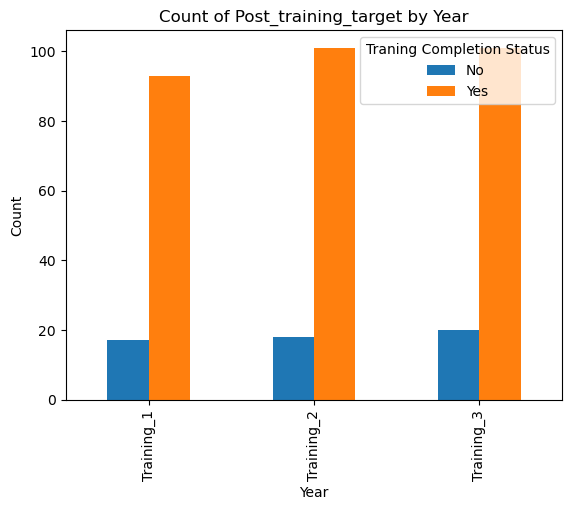

In [21]:
# Grouping by year and Post_training_target and counting
grouped1 = df1.groupby(["Training_ID", "Training_completion_status"]).size().unstack(fill_value=0)

# Plotting the bar chart
grouped1.plot(kind="bar")

plt.title("Count of Post_training_target by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Traning Completion Status", loc="upper right")

plt.show()

The diagram shows that a large population of their staffs actually completed the training program when compared to those who did not.

# Conclusion 

After carefully examining the data in relation to the business objectives, the following insights was derived.

The overall best performing training program was Training_2 after it recorded about a 10% increase in the post training target achievement rate. the second best was traning_3 after an increase of 3% and the worst performing was training_1 with increase of just 0.9%. It is however important to know that the outcome of these training was noted not to be statistically significant but as a result of random chance. To carefully understand this, employees who failed to complete the training was dropped. After carefully dropping employees that did not complete the program, training_2 was still the best performing following also by training_3 with a post training target achievement rate increase of 9% and 5% respectively. however, the result still failed to show that this result was statistically significant.

Year by Year examination of the data show that the trainees only achieved their post training targets in 2021 with traning_2 still topping the chart after 70 trainees achieved their target while 40 failed. However, when the significance of this outcome was tested, it produced a p-value of over 80% strongly indicating that the outcome was due to random chance. This is true as 2021 is when Covid-19 restrictions and lockdown was eased leading to pending deals being finalized and closed which was then registered as part of their 2021 target.


# Recommendation 

Based on the analysis conducted, the following recommendation were made:

1) The total efficiency of these training programs needs to be completely evaluated by completely taking a survey of the trainees who attended these programs not minding if they completed or not. This will help us understand if the trainees believe these programs had an effect on their efficiency or not. It's only when we have done this that we can fully know if any training program should be dropped or scraped all.

2) Conducting further analysis to explore potential factors that might contribute to the lack of statistical significance in the results. For example, we could explore demographic variables or other external factors that could impact training effectiveness.
